In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [61]:
#reading the data
df = pd.read_csv("winequality-red.csv")
x1 = df['fixed acidity'].values
x2 = df['volatile acidity'].values
x3 = df['citric acid'].values
x4 = df['residual sugar'].values
x5 = df['chlorides'].values
x6 = df['free sulfur dioxide'].values
x7 = df['total sulfur dioxide'].values
x8 = df['density'].values
x9 = df['pH'].values
x10 = df['sulphates'].values
x11 = df['alcohol'].values
y = df['quality'].values

In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
#feature scaling using Mean Normalization
X1=x1
X2=x2
X3=x3
X4=x4
X5=x5
X6=(x6-x6.mean())/x6.std()
X7=(x7-x7.mean())/x7.std()
X8=x8
X9=x9
X10=x10
X11=x11

In [64]:
#hypothesis
def hypothesis(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11):
    return theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x3 + theta[4]*x4 + theta[5]*x5 + theta[6]*x6 + theta[7]*x7 + theta[8]*x8 + theta[9]*x9 + theta[10]*x10 + theta[11]*x11

In [65]:
#cost function
def cost(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, y):
    m = x1.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(theta, x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i], x8[i], x9[i], x10[i], x11[i])
        error = error + (hx - y[i])**2
    return error

In [66]:
#partial derivative of the cost function
def diffGradient(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, y):
    m = x1.shape[0]
    grad = np.zeros((12,))
    for i in range(m):
        hx = hypothesis(theta, x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i], x8[i], x9[i], x10[i], x11[i])
        grad[0] = grad[0] + (hx - y[i])
        grad[1] = grad[1] + (hx - y[i])*x1[i]
        grad[2] = grad[2] + (hx - y[i])*x2[i]
        grad[3] = grad[3] + (hx - y[i])*x3[i]
        grad[4] = grad[4] + (hx - y[i])*x4[i]
        grad[5] = grad[5] + (hx - y[i])*x5[i]
        grad[6] = grad[6] + (hx - y[i])*x6[i]
        grad[7] = grad[7] + (hx - y[i])*x7[i]
        grad[8] = grad[8] + (hx - y[i])*x8[i]
        grad[9] = grad[9] + (hx - y[i])*x9[i]
        grad[10] = grad[10] + (hx - y[i])*x10[i]
        grad[11] = grad[11] + (hx - y[i])*x11[i]
    return grad

In [67]:
#finding the gradient descent
def gradientDescent(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, y, learning_rate = 0.0001):
    theta = np.zeros((12,),dtype = float)
    error_list = []
    theta_list = []
    max_iter = 300
    m = x1.shape[0]
    for i in range(max_iter):
        grad = diffGradient(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, y)
        e = cost(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, y)
        error_list.append(e)
        theta_list.append((theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8],theta[9],theta[10],theta[11]))
        #simultaneously update theta values
        theta[0] = theta[0] - learning_rate*(1/m)*grad[0]
        theta[1] = theta[1] - learning_rate*(1/m)*grad[1]
        theta[2] = theta[2] - learning_rate*(1/m)*grad[2]
        theta[3] = theta[3] - learning_rate*(1/m)*grad[3]
        theta[4] = theta[4] - learning_rate*(1/m)*grad[4]
        theta[5] = theta[5] - learning_rate*(1/m)*grad[5]
        theta[6] = theta[6] - learning_rate*(1/m)*grad[6]
        theta[7] = theta[7] - learning_rate*(1/m)*grad[7]
        theta[8] = theta[8] - learning_rate*(1/m)*grad[8]
        theta[9] = theta[9] - learning_rate*(1/m)*grad[9]
        theta[10] = theta[10] - learning_rate*(1/m)*grad[10]
        theta[11] = theta[11] - learning_rate*(1/m)*grad[11]
    return theta, error_list, theta_list

In [68]:
final_theta, error_list, theta_list = gradientDescent(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, y)

In [69]:
print(final_theta)

[ 0.02861626  0.22654608  0.01414173  0.00729972  0.06760284  0.00239092
  0.00041057 -0.00215074  0.0285085   0.09532207  0.01942388  0.30250962]


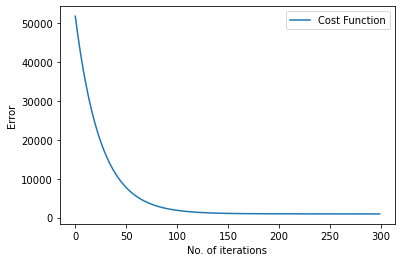

In [70]:
plt.plot(error_list, label='Cost Function')
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

In [71]:
def predict(theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11):
    hx = hypothesis(final_theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11)
    return hx

In [72]:
x1 = np.array([12.6])
x2 = np.array([0.31])
x3 = np.array([0.72])
x4 = np.array([2.2])
x5 = np.array([0.07200000000000001])
x6 = np.array([6.0])
x7 = np.array([29.0])
x8 = np.array([0.9987])
x9 = np.array([2.88])
x10 = np.array([0.82])
x11 = np.array([9.8])

In [73]:
prediction = hypothesis(final_theta, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11)
print(prediction)


[6.26524783]
